In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tsla = pd.read_csv("TSLA.csv")
tsla.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [4]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


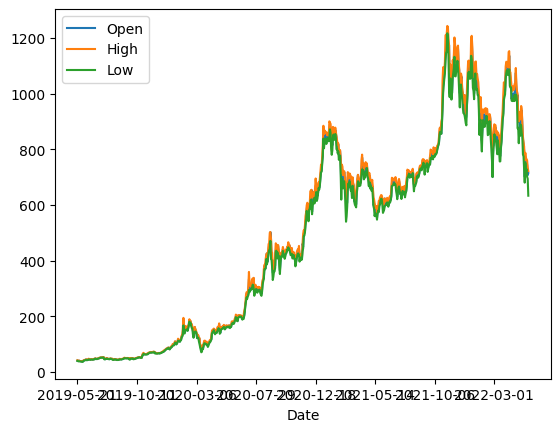

In [5]:
# >>> import matplotlib.pyplot as plt
tsla.plot(x="Date", y=["Open", "High", "Low"])
plt.show()

In [6]:
tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.0,758.000000
mean,485.876984,497.135347,473.316225,485.531513,4.693252e+07,0.0,0.006596
std,353.897173,361.762103,344.581855,353.160353,3.393843e+07,0.0,0.181608
min,36.220001,37.335999,35.397999,35.793999,9.800600e+06,0.0,0.000000
25%,113.061998,115.117502,109.650499,112.323500,2.431762e+07,0.0,0.000000
50%,485.494995,501.315002,458.930008,488.125000,3.448050e+07,0.0,0.000000
75%,766.029984,779.285019,748.804977,762.142502,6.008200e+07,0.0,0.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08,0.0,5.000000


In [7]:
tsla.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla['Date_ordinal'] = tsla['Date'].apply(lambda date: date.toordinal())

In [13]:
tsla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_ordinal
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0,737200
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0,737201
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0,737202
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0,737203
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0,737207


In [20]:
#split the data into x and y
x = tsla[['Date']]
y = tsla.drop(["Date",'Date_ordinal'], axis=1)

#split the data into train and test
x_train, x_test, y_train, y_tset = train_test_split(x,y, test_size=0.2, random_state=42)

# model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming tsla is your DataFrame and 'Date' is the column containing the dates
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla['Date_Ordinal'] = tsla['Date'].apply(lambda date: date.toordinal())

# Split the data into x and y
x = tsla.drop(['Date', 'Date_Ordinal'], axis=1)
y = tsla['Date_Ordinal']

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model 
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Convert predictions back to datetime
y_pred_dates = pd.to_datetime([pd.Timestamp.fromordinal(int(pred)) for pred in y_pred])

# Display first 5 predicted dates
print(y_pred_dates[:5])


DatetimeIndex(['2021-09-28', '2019-10-08', '2020-07-01', '2021-12-28',
               '2021-09-15'],
              dtype='datetime64[ns]', freq=None)


In [23]:

# predict the model
y_pred = model.predict(x_test)

y_pred_dates = pd.to_datetime([pd.Timestamp.fromordinal(int(pred)) for pred in y_pred])


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None